
# Text Modelling - NLP with Python

### Independent Study : IMT 600

#### Manas Thakre

This is the notebook I prepared for conducting NLP in python using nltk library primarily on the open source __"SMS Spam Collection Data Set"__ hosted by _University of California, Irvine_, as a part of their Machine Learning repository to promote the data analytics research

Here, I will perform a top level Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand (Writing functions similar to Countvectorizer) 

Note: The dataset I have downloaded and kept in the folder named __"data"__ in the same repository. If you want to run this notebook you need to keep the __data__ folder in same repo as this notebook


In [1]:
# Importing all required libraries here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import numpy as np
import sklearn

%matplotlib inline

## View the data

In [2]:
messages = [line.rstrip() for line in open('data/SMSSpamCollection')]
print(len(messages))

5574


Lets see how the data looks like. Printing first five messages:


In [3]:
for message_no, message in enumerate(messages[:5]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




This is a tsv file. __"Ham"__ and __"Spam"__ are corresponding labels for the messages.Using these labels, I will train a model which will classify these messages automatically. 

----

## Read the data to a pandas frame

Using Pandas to parse the data into a suitable dataframe

I'll use panda's _"read_csv"_ function to do this, and also put the names of the columns

In [4]:
messages = pd.read_csv('data/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


----

## Exploratory Data Analysis


In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Ham and Spam statistics

In [6]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4



I would like to add a new column to see the length of the text messages and will then visualize to check if there is any relation

In [7]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization


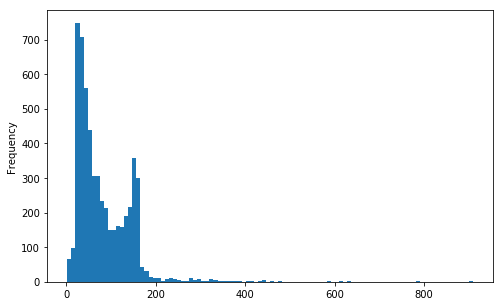

In [8]:
messages['length'].plot(bins=100, kind='hist',figsize= (8,5))

In [9]:
messages.length.describe() # See the little stats on message length.

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Checking the message with maximum of 910 characters

In [10]:
print(messages[messages['length'] == 910]['message'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


__Plotting the historgrams by Spam and Ham categories to visualize the variation and distribution in text lengths__

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD60655CC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001FD6076DB38>], dtype=object)

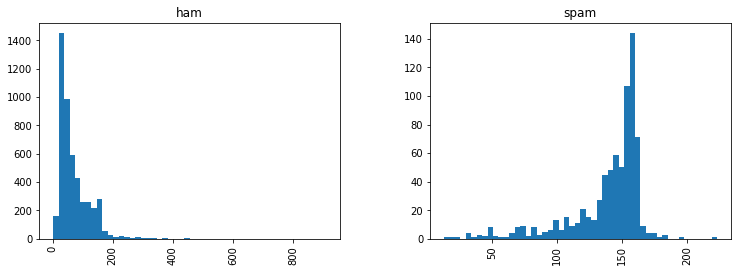

In [11]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

Looks like for "spam" messages the distribution is more centred around 150 words while for "ham" messages its around 50 words. This gives us a very important clue about how length of message is important.

-----

## Text Processing and Cleaning (Remove Stop words, etc..)

I will vectorize our text before we can do any kind of machine learning on it. 

Following the __Bag of Words__ approach here. For sake of learning, I will write a simple function to put in countvectorizer analyser.

Step 1: Removing punctuation using Python's built-in **string** library to get a list opunctuations in English language

In [12]:
import string

mess = "Greetings Mr. Manas ! Will you have some time today for coffee? If so, let's meet at EATC"

nopunc = [char for char in mess if char not in string.punctuation]

nopunc = ''.join(nopunc)

print(nopunc)

Greetings Mr Manas  Will you have some time today for coffee If so lets meet at EATC


Step 2: Remove stopwords using nltk stopword collection

In [13]:
from nltk.corpus import stopwords

In [14]:
nopunc.split()

['Greetings',
 'Mr',
 'Manas',
 'Will',
 'you',
 'have',
 'some',
 'time',
 'today',
 'for',
 'coffee',
 'If',
 'so',
 'lets',
 'meet',
 'at',
 'EATC']

In [15]:
# Remove stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
print(clean_mess)

['Greetings', 'Mr', 'Manas', 'time', 'today', 'coffee', 'lets', 'meet', 'EATC']


Wrapping the steps in a function

In [17]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Using this function to "tokenize" these messages

In [18]:
# Checking the result
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

----
## Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

I will use the function I made above as **analyzer** 

In [20]:
% time bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

Wall time: 2min 10s


In [21]:
# Print total number words in vocabulary
print(len(bow_transformer.vocabulary_))

11425


Using **.transform** on our Bag-of-Words (bow) transformed object. It should give us a large sparse matrix

In [22]:
messages_bow = bow_transformer.transform(messages['message'])

In [23]:
print('Dimesions of Resulting Sparse Matrix: ', messages_bow.shape)
print('Total Non-Zero occurences: ', messages_bow.nnz)

Dimesions of Resulting Sparse Matrix:  (5572, 11425)
Total Non-Zero occurences:  50548


In [24]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


___
## Making Tf-Idf corpus

After the counting, the term weighting and normalization can be done with tf-idf, using scikit-learn's `TfidfTransformer`.



In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
# just checking what is the IDF for word "love: and "usf"
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['usf']])

4.77365852365
7.22779351477


Transforming entire bag-of-words corpus into TF-IDF corpus

In [27]:
% time messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

Wall time: 12 ms
(5572, 11425)




## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). 

## Creating a Data Pipeline and making the classifier model



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [31]:
% time pipeline.fit(msg_train,label_train)

Wall time: 1min 25s


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001FD60BEC840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
% time predictions = pipeline.predict(msg_test)

Wall time: 24.1 s


In [33]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1004
       spam       0.71      1.00      0.83       111

avg / total       0.97      0.96      0.96      1115



In [34]:
print(confusion_matrix (predictions,label_test))

[[959  45]
 [  0 111]]


__Results:__ Accuracy of a classifier is good as visible from confusion matrix and classification report with high total precision, recall, etc... To achive more accuracy, the modifications dn trial/error methods can be applied either by using different types of tf-idf forms or more enhanced vectorizing techniques.

-----------